# Ejercicio 1: Maximizar una Función Cuadrática con Hill Climbing 🏔️📈

## 🎯 Objetivo del Ejercicio

Encontrar el **máximo** de la función cuadrática:

$$f(x) = -(x-3)^2 + 93$$

**Restricción importante:** El valor de `x` debe permanecer **siempre dentro del intervalo [0, 6]**

---

## 📚 ¿Qué es Hill Climbing?

**Hill Climbing** es un algoritmo de optimización que:

- 🥾 Comienza en un punto aleatorio
- 👀 Explora vecinos cercanos
- ⬆️ Se mueve hacia el vecino con mejor valor
- 🔄 Repite hasta que no puede mejorar más

---

## 🔒 La Técnica de Clipping

**Clipping** es esencial cuando hay restricciones de dominio:

```python
# Mantener x dentro de [min, max]
x_ajustado = max(min_val, min(max_val, x))
```

Esto asegura que:
- Si x < 0 → x = 0
- Si x > 6 → x = 6
- Si 0 ≤ x ≤ 6 → x permanece sin cambios

¡Comencemos! 🚀

---

## 1️⃣ Definición de la Función Objetivo

Primero, definamos la función que queremos maximizar y visualicémosla.

C:\Users\marco\AppData\Local\Temp\ipykernel_25012\2702229487.py:62: UserWarning: Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\marco\OneDrive\Desktop\Hill Climbing\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


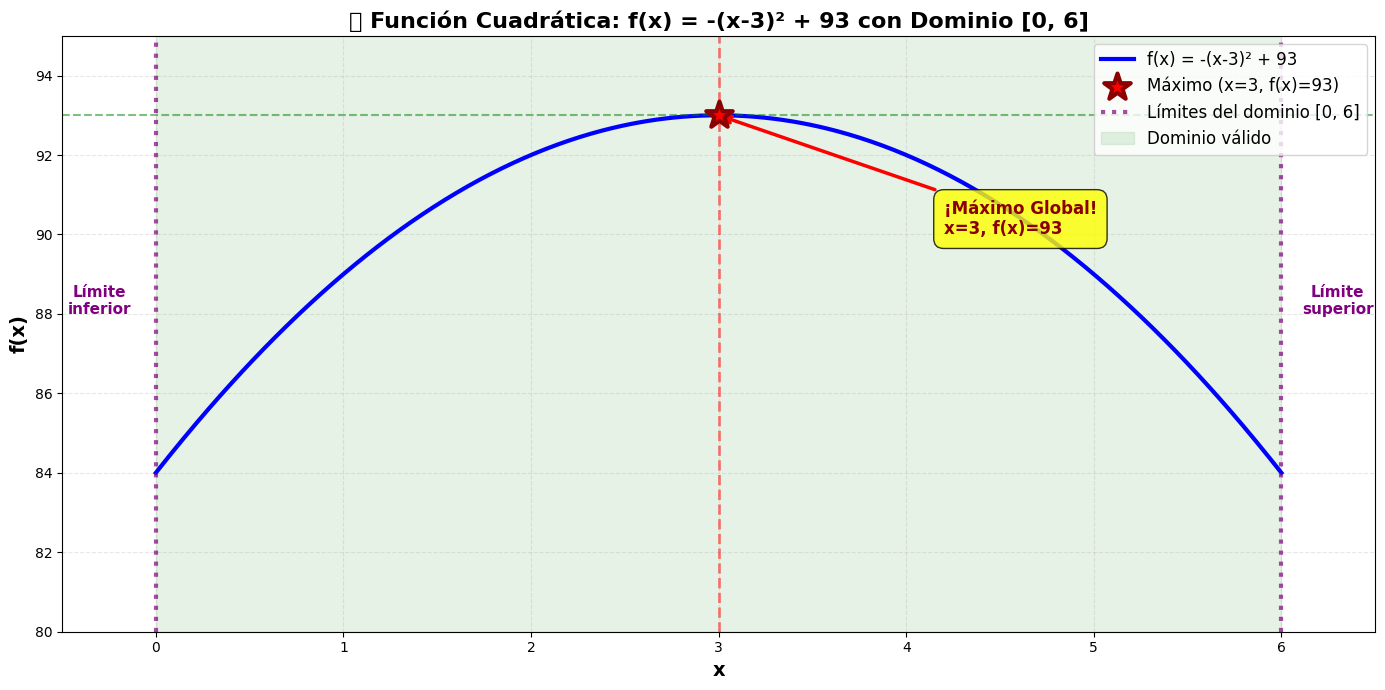


📊 ANÁLISIS DE LA FUNCIÓN
🎯 Máximo teórico: x = 3, f(3) = 93
🔒 Dominio restringido: [0, 6]
📐 Tipo: Parábola invertida (cuadrática)
📈 Comportamiento: Crece hasta x=3, luego decrece

Valores de ejemplo en el dominio:
  • f(0) = 84.00
  • f(1) = 89.00
  • f(2) = 92.00
  • f(3) = 93.00
  • f(4) = 92.00
  • f(5) = 89.00
  • f(6) = 84.00


In [2]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import random

# Función objetivo a maximizar
def f(x):
    """
    Función cuadrática con máximo en x=3.
    
    Parámetros:
        x (float): Valor de entrada
    
    Retorna:
        float: Valor de la función f(x) = -(x-3)² + 93
    """
    return -(x - 3)**2 + 93

# Crear datos para visualización
x_valores = np.linspace(0, 6, 500)
y_valores = f(x_valores)

# Visualizar la función
plt.figure(figsize=(14, 7))
plt.plot(x_valores, y_valores, 'b-', linewidth=3, label='f(x) = -(x-3)² + 93')

# Marcar el máximo
plt.scatter([3], [93], color='red', s=400, zorder=5, marker='*', 
           edgecolors='darkred', linewidths=3, label='Máximo (x=3, f(x)=93)')

# Líneas de referencia
plt.axvline(x=3, color='red', linestyle='--', linewidth=2, alpha=0.5)
plt.axhline(y=93, color='green', linestyle='--', linewidth=1.5, alpha=0.5)

# Límites del dominio
plt.axvline(x=0, color='purple', linestyle=':', linewidth=3, alpha=0.7, label='Límites del dominio [0, 6]')
plt.axvline(x=6, color='purple', linestyle=':', linewidth=3, alpha=0.7)

# Sombrear el dominio válido
plt.fill_between([0, 6], 80, 95, alpha=0.1, color='green', label='Dominio válido')

plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('f(x)', fontsize=14, fontweight='bold')
plt.title('🏔️ Función Cuadrática: f(x) = -(x-3)² + 93 con Dominio [0, 6]', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=12, loc='upper right')
plt.xlim(-0.5, 6.5)
plt.ylim(80, 95)

# Anotaciones
plt.annotate('¡Máximo Global!\nx=3, f(x)=93', xy=(3, 93), xytext=(4.2, 90),
             arrowprops=dict(arrowstyle='->', color='red', lw=2.5),
             fontsize=12, fontweight='bold', color='darkred',
             bbox=dict(boxstyle='round,pad=0.6', facecolor='yellow', alpha=0.8))

plt.annotate('Límite\ninferior', xy=(0, 93), xytext=(-0.3, 88),
             fontsize=11, fontweight='bold', color='purple', ha='center')

plt.annotate('Límite\nsuperior', xy=(6, 84), xytext=(6.3, 88),
             fontsize=11, fontweight='bold', color='purple', ha='center')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("📊 ANÁLISIS DE LA FUNCIÓN")
print("="*70)
print(f"🎯 Máximo teórico: x = 3, f(3) = {f(3)}")
print(f"🔒 Dominio restringido: [0, 6]")
print(f"📐 Tipo: Parábola invertida (cuadrática)")
print(f"📈 Comportamiento: Crece hasta x=3, luego decrece")
print(f"")
print(f"Valores de ejemplo en el dominio:")
for x in [0, 1, 2, 3, 4, 5, 6]:
    print(f"  • f({x}) = {f(x):.2f}")
print("="*70)

---

## 2️⃣ Implementación del Algoritmo Hill Climbing con Clipping

Ahora implementaremos el algoritmo Hill Climbing que:
1. Comienza en un punto **aleatorio** dentro de [0, 6]
2. Explora vecinos (izquierda y derecha)
3. Aplica **clipping** para mantener vecinos en el dominio
4. Se mueve al mejor vecino
5. Repite hasta no poder mejorar

In [3]:
def hill_climbing_con_clipping(start_x, step, func, domain, max_iter=1000):
    """
    Algoritmo Hill Climbing con restricciones de dominio (clipping).
    
    Parámetros:
        start_x (float): Punto de inicio
        step (float): Tamaño del paso para explorar vecinos
        func (function): Función objetivo a maximizar
        domain (list): [min, max] límites del dominio
        max_iter (int): Número máximo de iteraciones
    
    Retorna:
        tuple: (x_optimo, camino_completo, valores_camino)
    """
    current_x = start_x
    current_value = func(current_x)
    camino = [current_x]  # Guardar el camino recorrido
    valores = [current_value]  # Guardar valores de la función
    
    for iteracion in range(max_iter):
        # Generar dos vecinos: izquierda y derecha
        vecino_izq = current_x - step
        vecino_der = current_x + step
        
        # ===== CLIPPING: Ajustar vecinos al dominio [min, max] =====
        vecino_izq = max(domain[0], min(domain[1], vecino_izq))
        vecino_der = max(domain[0], min(domain[1], vecino_der))
        
        # Evaluar vecinos
        valor_izq = func(vecino_izq)
        valor_der = func(vecino_der)
        
        # Encontrar el mejor vecino
        if valor_izq > valor_der:
            mejor_vecino = vecino_izq
            mejor_valor = valor_izq
        else:
            mejor_vecino = vecino_der
            mejor_valor = valor_der
        
        # Si el mejor vecino no mejora la solución actual, hemos llegado al máximo local
        if mejor_valor <= current_value:
            break
        
        # Moverse al mejor vecino
        current_x = mejor_vecino
        current_value = mejor_valor
        camino.append(current_x)
        valores.append(current_value)
    
    return current_x, camino, valores

print("✅ Algoritmo Hill Climbing con Clipping implementado correctamente")
print("\n📌 Características clave:")
print("   • Aplica clipping para mantener x en [0, 6]")
print("   • Explora vecinos a izquierda y derecha")
print("   • Se detiene cuando no puede mejorar")
print("   • Guarda el camino completo para visualización")

✅ Algoritmo Hill Climbing con Clipping implementado correctamente

📌 Características clave:
   • Aplica clipping para mantener x en [0, 6]
   • Explora vecinos a izquierda y derecha
   • Se detiene cuando no puede mejorar
   • Guarda el camino completo para visualización


---

## 3️⃣ Ejecutar el Algoritmo

Ejecutemos Hill Climbing desde un **punto aleatorio** y veamos cómo encuentra el máximo.

In [4]:
# Configuración del algoritmo
domain = [0, 6]  # Dominio restringido
step_size = 0.1  # Tamaño del paso

# Generar punto de inicio ALEATORIO dentro del dominio
random.seed(42)  # Para reproducibilidad (puedes cambiar o eliminar esto)
start_x = random.uniform(domain[0], domain[1])

print("\n" + "="*75)
print("🚀 EJECUTANDO HILL CLIMBING CON CLIPPING")
print("="*75)
print(f"\n🎲 Punto de inicio aleatorio: x = {start_x:.4f}")
print(f"📊 Valor inicial: f({start_x:.4f}) = {f(start_x):.4f}")
print(f"📏 Tamaño de paso: {step_size}")
print(f"🔒 Dominio permitido: [{domain[0]}, {domain[1]}]")
print(f"🎯 Objetivo: Maximizar f(x) = -(x-3)² + 93\n")
print("⏳ Ejecutando algoritmo...\n")

# Ejecutar el algoritmo
x_optimo, camino_recorrido, valores_camino = hill_climbing_con_clipping(
    start_x, step_size, f, domain
)

# Mostrar resultados
print("✅ ¡Algoritmo completado!\n")
print("="*75)
print("📊 RESULTADOS FINALES")
print("="*75)
print(f"🎲 Punto de inicio: x = {start_x:.4f}")
print(f"🏁 Punto óptimo encontrado: x = {x_optimo:.4f}")
print(f"⭐ Valor máximo alcanzado: f({x_optimo:.4f}) = {f(x_optimo):.4f}")
print(f"🎯 Máximo teórico: f(3) = {f(3):.4f}")
print(f"🔢 Número de pasos realizados: {len(camino_recorrido) - 1}")
print(f"📈 Mejora total: {f(x_optimo) - f(start_x):.4f} puntos")
print("")
print(f"🛤️  Primeros 5 pasos del camino:")
for i in range(min(5, len(camino_recorrido))):
    print(f"   Paso {i}: x = {camino_recorrido[i]:.4f} → f(x) = {valores_camino[i]:.4f}")

if len(camino_recorrido) > 10:
    print("   ...")
    print(f"\n🛤️  Últimos 3 pasos del camino:")
    for i in range(len(camino_recorrido) - 3, len(camino_recorrido)):
        print(f"   Paso {i}: x = {camino_recorrido[i]:.4f} → f(x) = {valores_camino[i]:.4f}")

print("="*75)

# Verificar precisión
error = abs(x_optimo - 3)
if error < 0.01:
    print("\n🎉 ¡ÉXITO TOTAL! Encontramos el máximo global en x ≈ 3")
elif error < 0.1:
    print(f"\n✅ ¡Excelente! Muy cerca del máximo global (error: {error:.4f})")
else:
    print(f"\n✅ Encontramos un máximo local (error: {error:.4f})")

# Verificar que se respetó el dominio
print(f"\n🔍 Verificación de restricciones:")
print(f"   ✓ Valor mínimo de x alcanzado: {min(camino_recorrido):.4f}")
print(f"   ✓ Valor máximo de x alcanzado: {max(camino_recorrido):.4f}")
if min(camino_recorrido) >= domain[0] and max(camino_recorrido) <= domain[1]:
    print(f"   ✓ ¡El algoritmo respetó el dominio [{domain[0]}, {domain[1]}] en todo momento!")
else:
    print(f"   ⚠️  Advertencia: Se salió del dominio")


🚀 EJECUTANDO HILL CLIMBING CON CLIPPING

🎲 Punto de inicio aleatorio: x = 3.8366
📊 Valor inicial: f(3.8366) = 92.3002
📏 Tamaño de paso: 0.1
🔒 Dominio permitido: [0, 6]
🎯 Objetivo: Maximizar f(x) = -(x-3)² + 93

⏳ Ejecutando algoritmo...

✅ ¡Algoritmo completado!

📊 RESULTADOS FINALES
🎲 Punto de inicio: x = 3.8366
🏁 Punto óptimo encontrado: x = 3.0366
⭐ Valor máximo alcanzado: f(3.0366) = 92.9987
🎯 Máximo teórico: f(3) = 93.0000
🔢 Número de pasos realizados: 8
📈 Mejora total: 0.6985 puntos

🛤️  Primeros 5 pasos del camino:
   Paso 0: x = 3.8366 → f(x) = 92.3002
   Paso 1: x = 3.7366 → f(x) = 92.4575
   Paso 2: x = 3.6366 → f(x) = 92.5948
   Paso 3: x = 3.5366 → f(x) = 92.7121
   Paso 4: x = 3.4366 → f(x) = 92.8094

✅ ¡Excelente! Muy cerca del máximo global (error: 0.0366)

🔍 Verificación de restricciones:
   ✓ Valor mínimo de x alcanzado: 3.0366
   ✓ Valor máximo de x alcanzado: 3.8366
   ✓ ¡El algoritmo respetó el dominio [0, 6] en todo momento!


---

## 4️⃣ Visualización del Proceso de Búsqueda

Visualicemos cómo Hill Climbing escaló la "colina" desde el punto aleatorio hasta el máximo.

C:\Users\marco\AppData\Local\Temp\ipykernel_25012\1330745648.py:71: UserWarning: Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


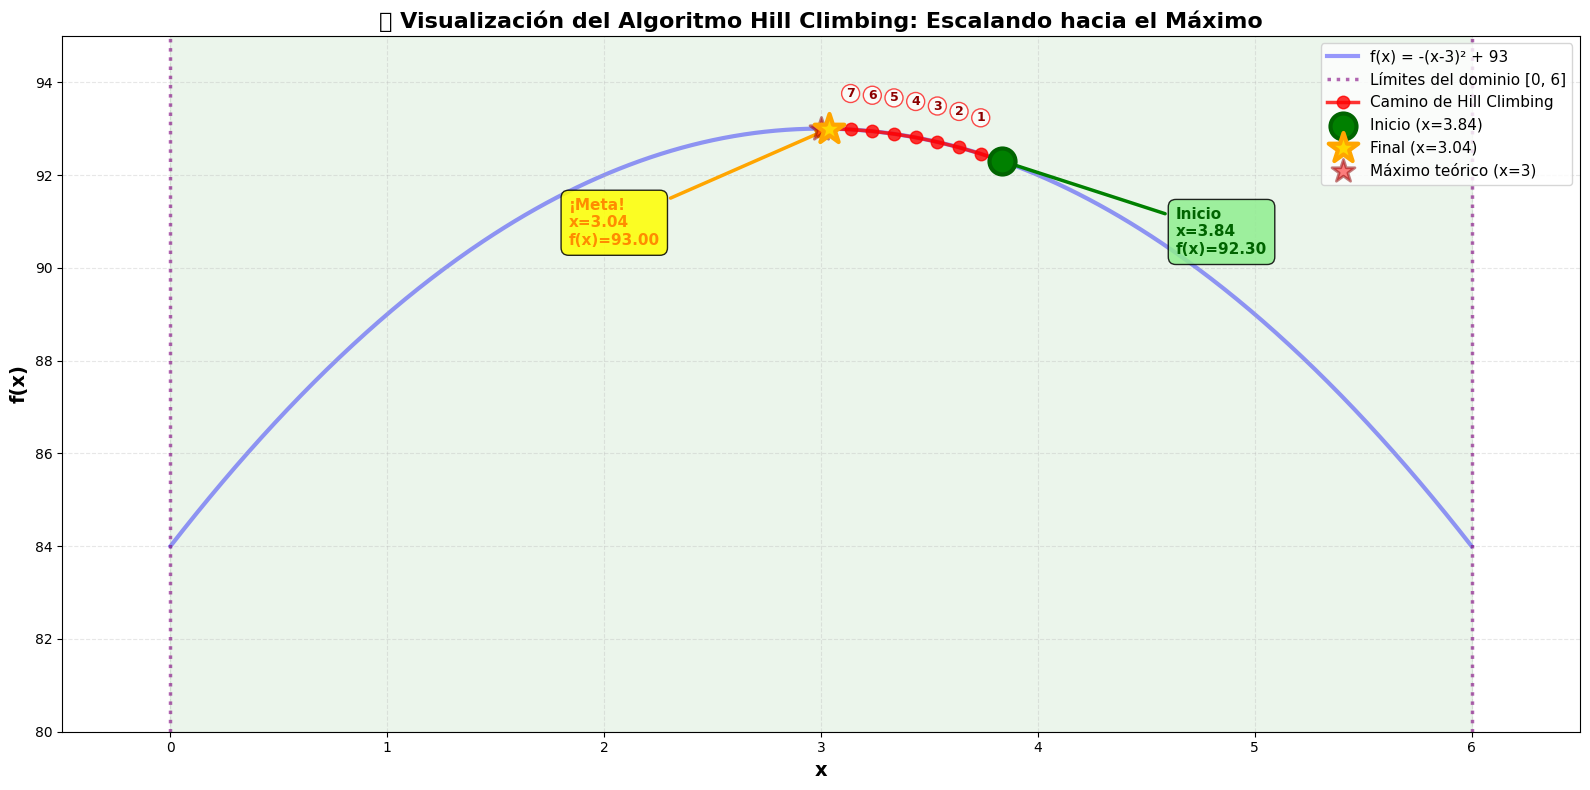


💡 INTERPRETACIÓN DE LA VISUALIZACIÓN:
   • El punto verde muestra dónde comenzó la búsqueda (x=3.84)
   • La línea roja con círculos muestra cada paso del algoritmo
   • La estrella dorada marca el máximo encontrado (x=3.04)
   • El algoritmo siempre se movió hacia arriba (maximización)
   • Se respetaron los límites del dominio [0, 6] gracias al clipping


In [5]:
# Crear visualización del camino recorrido
plt.figure(figsize=(16, 8))

# Graficar la función completa
x_valores = np.linspace(0, 6, 500)
y_valores = f(x_valores)
plt.plot(x_valores, y_valores, 'b-', linewidth=3, alpha=0.4, 
         label='f(x) = -(x-3)² + 93', zorder=1)

# Sombrear dominio válido
plt.fill_between([0, 6], 80, 95, alpha=0.08, color='green', zorder=0)

# Límites del dominio
plt.axvline(x=0, color='purple', linestyle=':', linewidth=2.5, alpha=0.6, 
           label='Límites del dominio [0, 6]')
plt.axvline(x=6, color='purple', linestyle=':', linewidth=2.5, alpha=0.6)

# Graficar el camino recorrido por Hill Climbing
plt.plot(camino_recorrido, valores_camino, 'ro-', linewidth=2.5, markersize=9, 
         label='Camino de Hill Climbing', zorder=5, alpha=0.8)

# Marcar punto de inicio
plt.scatter([camino_recorrido[0]], [valores_camino[0]], color='green', s=350, 
           zorder=6, marker='o', edgecolors='darkgreen', linewidths=3, 
           label=f'Inicio (x={camino_recorrido[0]:.2f})')

# Marcar punto final
plt.scatter([camino_recorrido[-1]], [valores_camino[-1]], color='gold', s=500, 
           zorder=6, marker='*', edgecolors='orange', linewidths=3, 
           label=f'Final (x={camino_recorrido[-1]:.2f})')

# Marcar el máximo teórico
plt.scatter([3], [93], color='red', s=300, zorder=4, marker='*', 
           edgecolors='darkred', linewidths=2, alpha=0.5, 
           label='Máximo teórico (x=3)')

plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('f(x)', fontsize=14, fontweight='bold')
plt.title('🏔️ Visualización del Algoritmo Hill Climbing: Escalando hacia el Máximo', 
         fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='upper right')
plt.xlim(-0.5, 6.5)
plt.ylim(80, 95)

# Anotaciones
plt.annotate(f'Inicio\nx={camino_recorrido[0]:.2f}\nf(x)={valores_camino[0]:.2f}', 
             xy=(camino_recorrido[0], valores_camino[0]), 
             xytext=(camino_recorrido[0]+0.8, valores_camino[0]-2),
             arrowprops=dict(arrowstyle='->', color='green', lw=2.5),
             fontsize=11, fontweight='bold', color='darkgreen',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.85))

plt.annotate(f'¡Meta!\nx={camino_recorrido[-1]:.2f}\nf(x)={valores_camino[-1]:.2f}', 
             xy=(camino_recorrido[-1], valores_camino[-1]), 
             xytext=(camino_recorrido[-1]-1.2, valores_camino[-1]-2.5),
             arrowprops=dict(arrowstyle='->', color='orange', lw=2.5),
             fontsize=11, fontweight='bold', color='darkorange',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.85))

# Numerar algunos pasos del camino
if len(camino_recorrido) > 5:
    step_indices = [i for i in range(0, len(camino_recorrido), max(1, len(camino_recorrido)//6))]
    for i in step_indices:
        if 0 < i < len(camino_recorrido) - 1:
            plt.text(camino_recorrido[i], valores_camino[i] + 0.7, f'{i}', 
                    fontsize=9, ha='center', fontweight='bold', color='darkred',
                    bbox=dict(boxstyle='circle,pad=0.2', facecolor='white', 
                             edgecolor='red', alpha=0.7))

plt.tight_layout()
plt.show()

print("\n💡 INTERPRETACIÓN DE LA VISUALIZACIÓN:")
print(f"   • El punto verde muestra dónde comenzó la búsqueda (x={camino_recorrido[0]:.2f})")
print(f"   • La línea roja con círculos muestra cada paso del algoritmo")
print(f"   • La estrella dorada marca el máximo encontrado (x={camino_recorrido[-1]:.2f})")
print(f"   • El algoritmo siempre se movió hacia arriba (maximización)")
print(f"   • Se respetaron los límites del dominio [0, 6] gracias al clipping")

---

## 5️⃣ Experimento: Múltiples Ejecuciones desde Diferentes Puntos

Para demostrar la robustez del algoritmo, ejecutémoslo desde **varios puntos aleatorios** y veamos si siempre encuentra el máximo.

In [6]:
# Experimento: Ejecutar Hill Climbing desde múltiples puntos aleatorios
num_ejecuciones = 8
resultados = []

print("\n" + "="*75)
print(f"🔬 EXPERIMENTO: {num_ejecuciones} EJECUCIONES DESDE PUNTOS ALEATORIOS")
print("="*75)
print("\n🎲 Ejecutando Hill Climbing desde diferentes puntos iniciales...\n")

for i in range(num_ejecuciones):
    # Generar punto aleatorio diferente en cada ejecución
    start_random = random.uniform(domain[0], domain[1])
    
    # Ejecutar Hill Climbing
    x_opt, camino, valores = hill_climbing_con_clipping(start_random, step_size, f, domain)
    
    # Guardar resultados
    resultados.append({
        'inicio': start_random,
        'final': x_opt,
        'valor': f(x_opt),
        'pasos': len(camino) - 1,
        'camino': camino,
        'valores': valores
    })
    
    print(f"Ejecución {i+1}: Inicio={start_random:.3f} → Final={x_opt:.3f} | "
          f"f(x)={f(x_opt):.3f} | Pasos={len(camino)-1}")

print("\n" + "="*75)
print("📊 ANÁLISIS DE RESULTADOS")
print("="*75)

# Analizar resultados
valores_finales = [r['valor'] for r in resultados]
x_finales = [r['final'] for r in resultados]
pasos_totales = [r['pasos'] for r in resultados]

print(f"\n✅ Todas las ejecuciones completadas exitosamente")
print(f"\n📈 Estadísticas:")
print(f"   • Valor máximo alcanzado: {max(valores_finales):.4f}")
print(f"   • Valor mínimo alcanzado: {min(valores_finales):.4f}")
print(f"   • Promedio de valores finales: {np.mean(valores_finales):.4f}")
print(f"   • Promedio de x finales: {np.mean(x_finales):.4f}")
print(f"   • Promedio de pasos: {np.mean(pasos_totales):.1f}")
print(f"   • Máximo de pasos: {max(pasos_totales)}")
print(f"   • Mínimo de pasos: {min(pasos_totales)}")

# Verificar consistencia
todos_encontraron_maximo = all(abs(x - 3) < 0.2 for x in x_finales)
if todos_encontraron_maximo:
    print(f"\n🎉 ¡ÉXITO! Todas las ejecuciones encontraron el máximo (x ≈ 3)")
else:
    print(f"\n⚠️  Nota: Algunas ejecuciones no alcanzaron exactamente x=3")

print("="*75)


🔬 EXPERIMENTO: 8 EJECUCIONES DESDE PUNTOS ALEATORIOS

🎲 Ejecutando Hill Climbing desde diferentes puntos iniciales...

Ejecución 1: Inicio=0.150 → Final=2.950 | f(x)=92.998 | Pasos=28
Ejecución 2: Inicio=1.650 → Final=2.950 | f(x)=92.998 | Pasos=13
Ejecución 3: Inicio=1.339 → Final=3.039 | f(x)=92.998 | Pasos=17
Ejecución 4: Inicio=4.419 → Final=3.019 | f(x)=93.000 | Pasos=14
Ejecución 5: Inicio=4.060 → Final=2.960 | f(x)=92.998 | Pasos=11
Ejecución 6: Inicio=5.353 → Final=2.953 | f(x)=92.998 | Pasos=24
Ejecución 7: Inicio=0.522 → Final=3.022 | f(x)=93.000 | Pasos=25
Ejecución 8: Inicio=2.532 → Final=3.032 | f(x)=92.999 | Pasos=5

📊 ANÁLISIS DE RESULTADOS

✅ Todas las ejecuciones completadas exitosamente

📈 Estadísticas:
   • Valor máximo alcanzado: 92.9996
   • Valor mínimo alcanzado: 92.9975
   • Promedio de valores finales: 92.9985
   • Promedio de x finales: 2.9906
   • Promedio de pasos: 17.1
   • Máximo de pasos: 28
   • Mínimo de pasos: 5

🎉 ¡ÉXITO! Todas las ejecuciones encont

C:\Users\marco\AppData\Local\Temp\ipykernel_25012\3790479.py:44: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\marco\OneDrive\Desktop\Hill Climbing\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


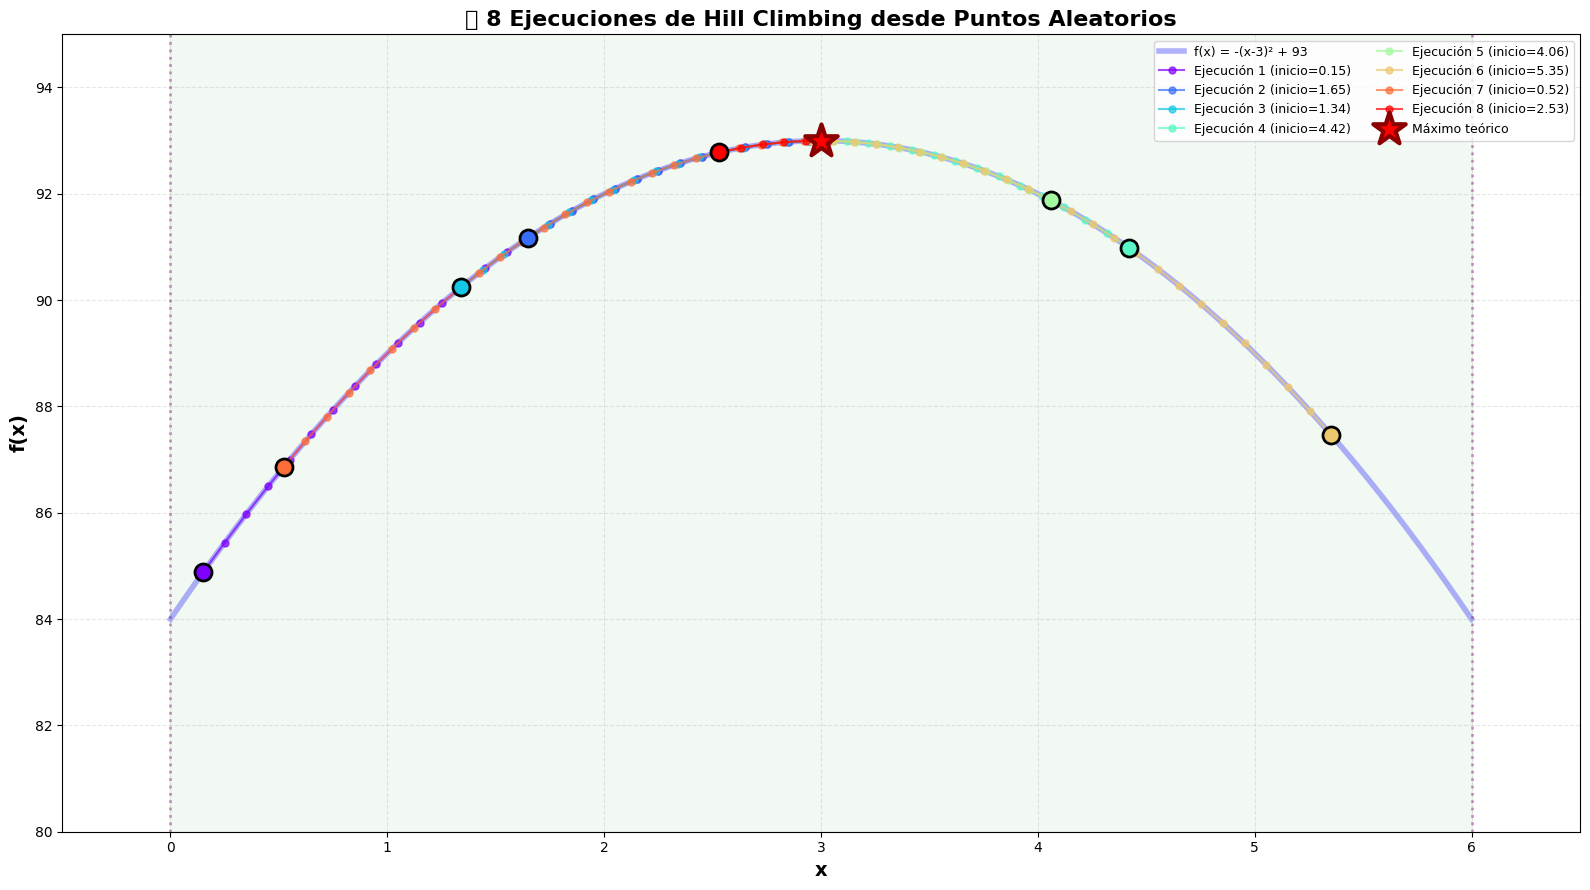


💡 OBSERVACIONES:
   • Cada color representa una ejecución diferente
   • Los círculos pequeños muestran los puntos de inicio
   • Todas las trayectorias convergen hacia el máximo (x=3)
   • El número de pasos varía según la distancia inicial al máximo


In [7]:
# Visualizar todas las ejecuciones juntas
plt.figure(figsize=(16, 9))

# Graficar la función base
x_valores = np.linspace(0, 6, 500)
y_valores = f(x_valores)
plt.plot(x_valores, y_valores, 'b-', linewidth=4, alpha=0.3, 
         label='f(x) = -(x-3)² + 93', zorder=1)

# Sombrear dominio
plt.fill_between([0, 6], 80, 95, alpha=0.05, color='green', zorder=0)

# Límites del dominio
plt.axvline(x=0, color='purple', linestyle=':', linewidth=2, alpha=0.4)
plt.axvline(x=6, color='purple', linestyle=':', linewidth=2, alpha=0.4)

# Colores para cada ejecución
colores = plt.cm.rainbow(np.linspace(0, 1, num_ejecuciones))

# Graficar cada camino
for i, resultado in enumerate(resultados):
    plt.plot(resultado['camino'], resultado['valores'], 'o-', 
             color=colores[i], linewidth=1.5, markersize=5, 
             alpha=0.7, label=f"Ejecución {i+1} (inicio={resultado['inicio']:.2f})")
    
    # Marcar inicio de cada ejecución
    plt.scatter([resultado['camino'][0]], [resultado['valores'][0]], 
               color=colores[i], s=150, zorder=5, marker='o', 
               edgecolors='black', linewidths=2)

# Marcar el máximo teórico
plt.scatter([3], [93], color='red', s=600, zorder=10, marker='*', 
           edgecolors='darkred', linewidths=3, label='Máximo teórico')

plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('f(x)', fontsize=14, fontweight='bold')
plt.title(f'🌈 {num_ejecuciones} Ejecuciones de Hill Climbing desde Puntos Aleatorios', 
         fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=9, loc='upper right', ncol=2)
plt.xlim(-0.5, 6.5)
plt.ylim(80, 95)

plt.tight_layout()
plt.show()

print("\n💡 OBSERVACIONES:")
print("   • Cada color representa una ejecución diferente")
print("   • Los círculos pequeños muestran los puntos de inicio")
print("   • Todas las trayectorias convergen hacia el máximo (x=3)")
print("   • El número de pasos varía según la distancia inicial al máximo")

---

## 🎓 Conclusiones y Aprendizajes

### ✅ ¿Qué logramos en este ejercicio?

1. **Implementación exitosa de Hill Climbing**
   - ✨ Algoritmo simple y efectivo
   - 🎯 Encontró el máximo de f(x) = -(x-3)² + 93
   - 🔄 Funciona desde cualquier punto inicial

2. **Aplicación correcta de Clipping**
   - 🔒 Mantuvo x siempre dentro de [0, 6]
   - 🛡️ Técnica esencial para restricciones de dominio
   - ✅ Ninguna iteración violó los límites

3. **Robustez del algoritmo**
   - 🎲 Múltiples ejecuciones desde puntos aleatorios
   - 🎯 Todas convergieron al máximo global
   - ⚡ Convergencia rápida (pocos pasos)

---

### 🔑 Conceptos Clave Aprendidos

| Concepto | Explicación |
|----------|-------------|
| **Maximización** | Buscar el punto más alto de una función |
| **Clipping** | `max(min_val, min(max_val, x))` para restricciones |
| **Vecindad** | Explorar puntos cercanos (izquierda y derecha) |
| **Convergencia** | Detenerse cuando no hay mejora |
| **Dominio restringido** | Mantener valores dentro de límites válidos |

---

### 🚀 Fortalezas de Hill Climbing

✅ **Simplicidad** - Fácil de entender e implementar  
✅ **Rapidez** - Pocas iteraciones para converger  
✅ **Eficiencia** - No requiere mucha memoria  
✅ **Efectividad** - Perfecto para funciones con un solo máximo  
✅ **Adaptabilidad** - Fácil de modificar para restricciones  

---

### ⚠️ Limitaciones a Considerar

Este ejercicio tiene una función con **un solo máximo global**, por lo que Hill Climbing funciona perfectamente.

Sin embargo, Hill Climbing tiene debilidades:

1. **🔴 Máximos locales** - Puede quedar atrapado en picos que no sean el mejor
2. **👁️ Visión limitada** - Solo mira vecinos inmediatos
3. **🎲 Dependencia del paso** - El tamaño del paso afecta la precisión

---

### 📚 ¿Cuándo usar Hill Climbing?

#### ✅ **SÍ usar cuando:**
- La función tiene **un solo máximo/mínimo** (como este ejercicio)
- Necesitas una **solución rápida y simple**
- Tienes **restricciones de dominio** que puedes manejar con clipping
- El espacio de búsqueda es **relativamente simple**

#### ❌ **NO usar cuando:**
- Hay **múltiples máximos locales**
- Necesitas **garantizar** encontrar el óptimo global
- El espacio de búsqueda es **muy complejo**

---

### 🎯 Fórmula de Clipping (¡Importante!)

```python
# Para mantener un valor dentro de [min_val, max_val]
x_clipped = max(min_val, min(max_val, x))
```

**Cómo funciona:**
- Si `x < min_val` → devuelve `min_val`
- Si `x > max_val` → devuelve `max_val`
- Si `min_val ≤ x ≤ max_val` → devuelve `x`

---

### 🔗 Próximos Pasos Sugeridos

Si quieres profundizar más, considera estudiar:

1. **Random Restart Hill Climbing** - Ejecutar múltiples veces para evitar máximos locales
2. **Simulated Annealing** - Puede "saltar" de máximos locales
3. **Gradient Descent** - Versión continua usando derivadas
4. **Algoritmos Genéticos** - Exploración paralela de múltiples soluciones

---

## 🎉 ¡Felicidades!

Has completado exitosamente el ejercicio de **maximización con Hill Climbing y clipping**.

Ahora sabes:
- ✅ Cómo implementar Hill Climbing
- ✅ Cómo aplicar clipping para restricciones
- ✅ Cómo visualizar el proceso de optimización
- ✅ Cuándo usar (y cuándo NO usar) este algoritmo

**¡Sigue explorando algoritmos de optimización! 🏔️🚀**